## Введение в машинное обучение: линейная регрессия

Загрузка исходных данных

In [3]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])


# текстовое описание датасета
# print('\n',boston_dataset.DESCR)

Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


## Задание 1

Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python 

Нужно написать код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$


Сравните по евклидовому расстоянию коэффициенты из класса `LinearRegression` и полученные аналитическим способом

In [4]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(features.shape[1])
#-------- ВАШ КОД ТУТ -------------------

X = features

ones_column = np.ones((X.shape[0], 1))
X = np.hstack((ones_column, X))

w_analytic = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')
print()

Аналитически определённые коэффициенты [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]



Проверка по евклидовой метрике

In [5]:
from numpy.linalg import inv, norm

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)
w_sklearn = np.append([reg.intercept_], reg.coef_)

try:
    linalg_norm = norm(w_sklearn - w_analytic)
    print(f"Коэффициенты, вычисленные моделью sklearn {w_sklearn}")
    print(f"Евклидово расстояние между наборами коэффициентов {linalg_norm}\n")
except:
    print("!ВАЖНО!: к матрице фичей X нужно добавить столбец, который состоит из единиц")
    print("Это т.н. 'тривиальный' признак $x_0=1$")

Коэффициенты, вычисленные моделью sklearn [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
Евклидово расстояние между наборами коэффициентов 1.4344906026048301e-11



Проверка на правильность

In [6]:
import unittest


class TestNotebook(unittest.TestCase):
    def test_task(self):
        self.assertAlmostEqual(linalg_norm, 0.000000, places=6)

unittest.main(argv=[''], verbosity=2, exit=False)

test_task (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## Задание 2

Визуализируйте в виде "столбиков" коэффициенты "из коробки" (т.е. из sklearn) и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

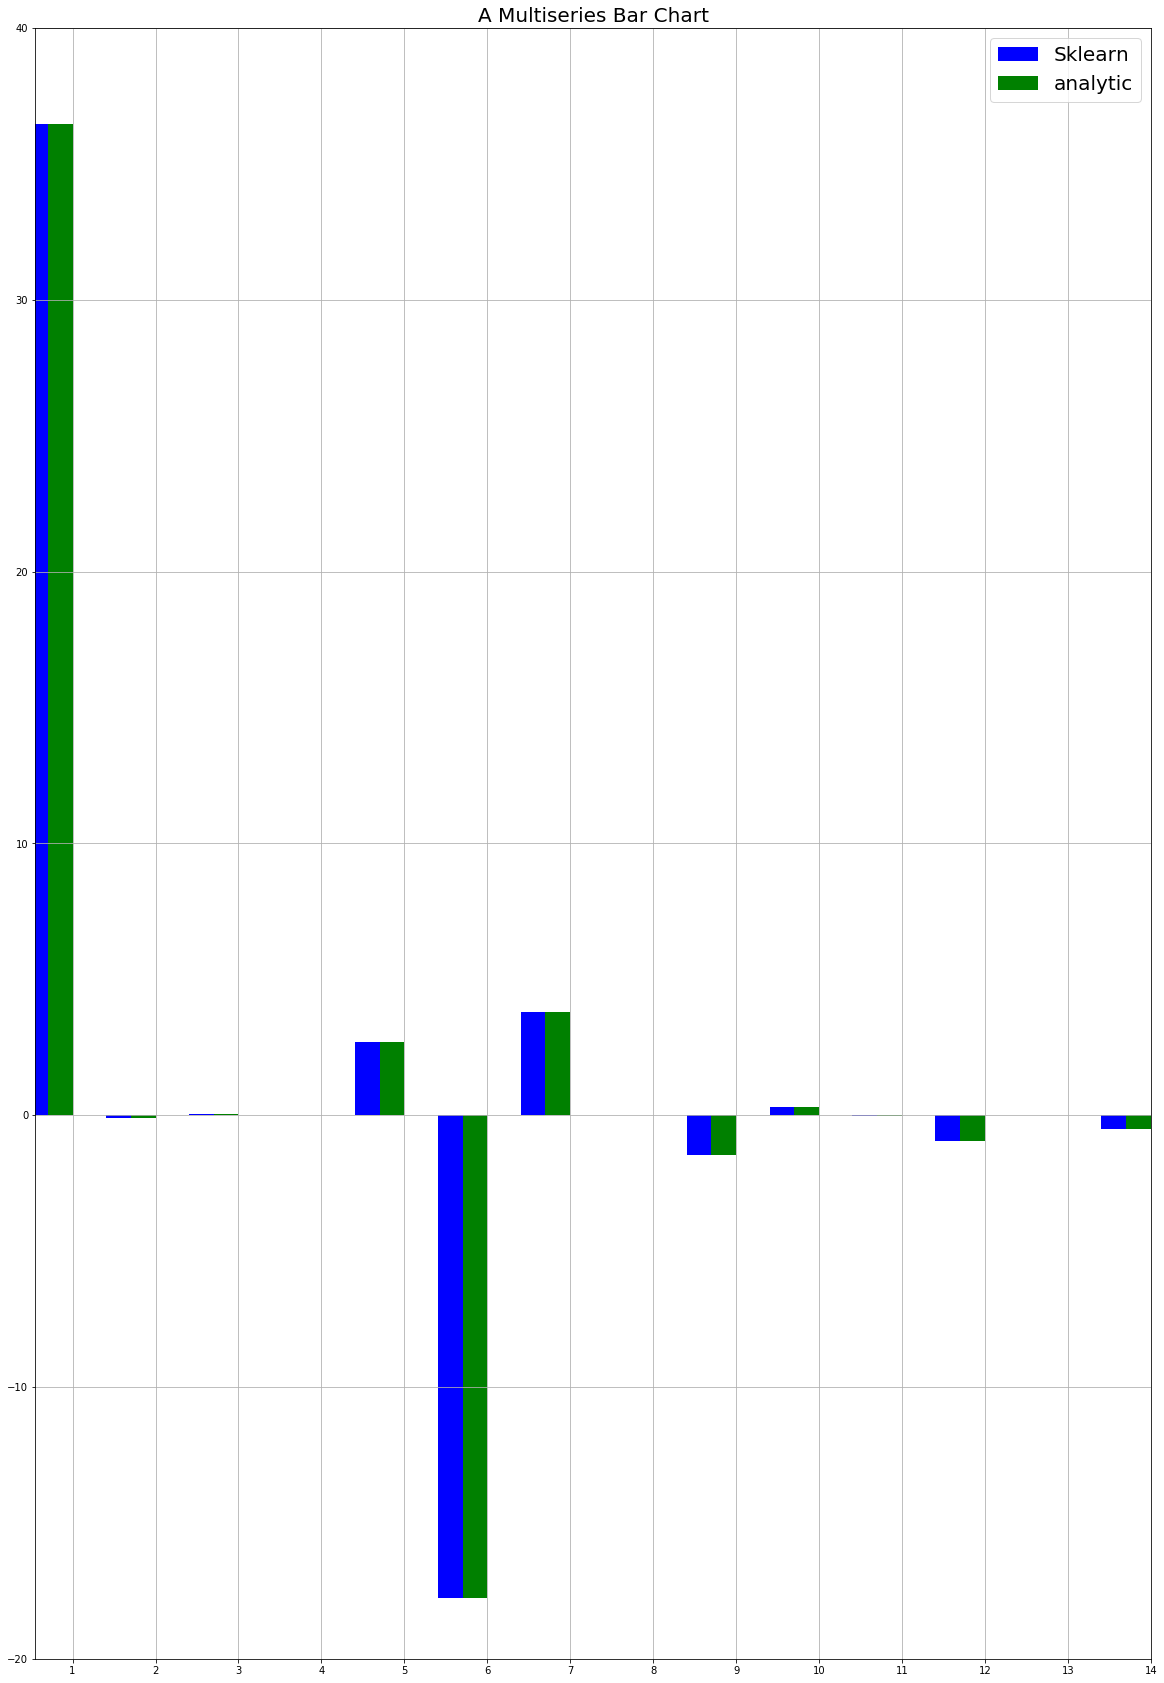

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

#-------- ВАШ КОД ТУТ -------------------

index = np.arange(14)
values1 = w_sklearn
values2 = w_analytic
bw = 0.3
plt.subplots(figsize=(20,30))
plt.grid()
plt.axis([0,5,-20,40])
plt.title('A Multiseries Bar Chart', fontsize=20)
plt.bar(index, values1, bw, color='b', label='Sklearn')
plt.bar(index+bw, values2, bw, color='g', label='analytic')
plt.xticks(index+1.5*bw, index+1 )
plt.legend(loc='upper right', prop={'size': 20})
plt.show()


#----------------------------------------

## Задание 3

Постройте предсказания двумя моделями

* вашей моделью
* моделью из библиотеки sklearn

Посчитайте, какую ошибку $(\hat{y}-y)$ даёт модели на каждом обучающем примере каждая из моделей и постройте две гистограммы на одном графике c наложением (одна должна "просвечивать" через другую)

Если вы всё сделали правильно, гистограммы ошибок должны совпасть

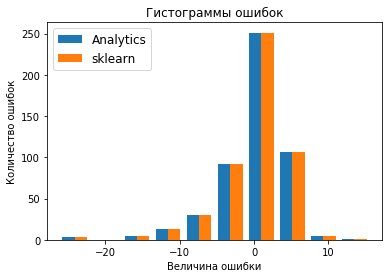

In [10]:
%matplotlib inline

#-------- ВАШ КОД ТУТ -------------------
y_analytic = X.dot(w_analytic) # наша модель
y_sklearn = reg.predict(features) # модель из sklearn
y_real = y

fig, subplot = plt.subplots()

subplot.hist([y_analytic - y_real, y_sklearn - y_real], label=['Analytics', 'sklearn'])

subplot.set_title('Гистограммы ошибок')
subplot.set_xlabel('Величина ошибки')
subplot.set_ylabel('Количество ошибок')

plt.legend(loc='upper left', prop={'size': 12})
plt.show()